In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load processed data

df = pd.read_csv(
   "../data/processed/superstore_processed.csv",
    parse_dates=["Order Date", "Ship Date"] 
)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,26196.0,2,0.00,419136.0
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",73194.0,3,0.00,219582.0
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1462.0,2,0.00,68714.0
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,9575775.0,5,0.45,-383031.0
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22368.0,2,0.20,25164.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df = df.sort_values("Order Date")

In [9]:
monthly_sales = (
    df
    .set_index("Order Date")
    .resample("ME")
    .agg({
        "Sales": "sum",
        "Profit": "sum"
    })
    .reset_index()
)

monthly_sales.head()

,Order Date,Sales,Profit
0,2014-01-31,2908640.0,19371907.0
1,2014-02-28,799427.0,5555821.0
2,2014-03-31,19889225.0,-6238905.0
3,2014-04-30,8814899.0,27861575.0
4,2014-05-31,9349645.0,23947377.0


In [11]:
monthly_sales.shape


(48, 3)

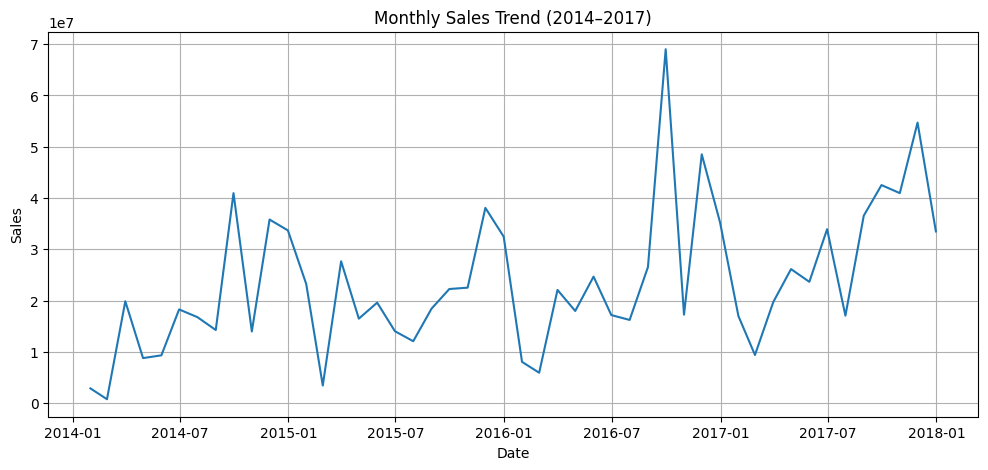

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"])
plt.title("Monthly Sales Trend (2014–2017)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


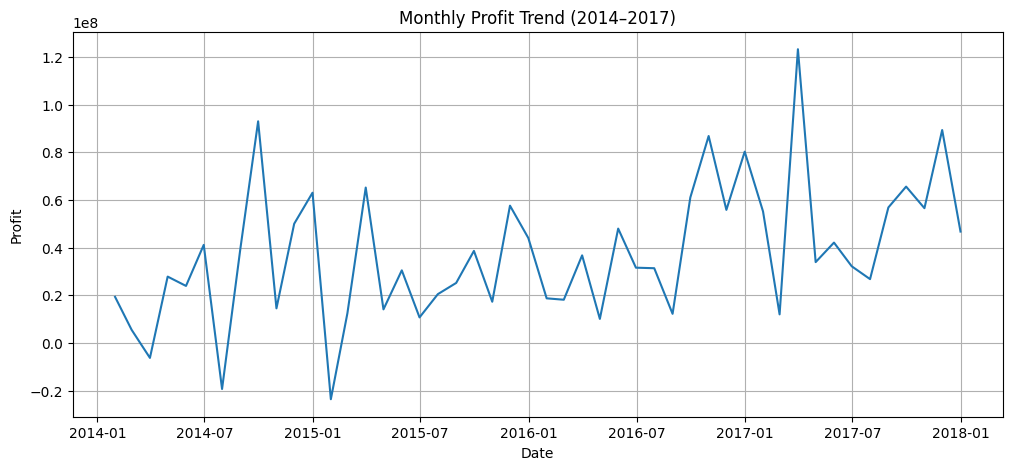

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Profit"])
plt.title("Monthly Profit Trend (2014–2017)")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.grid(True)
plt.show()


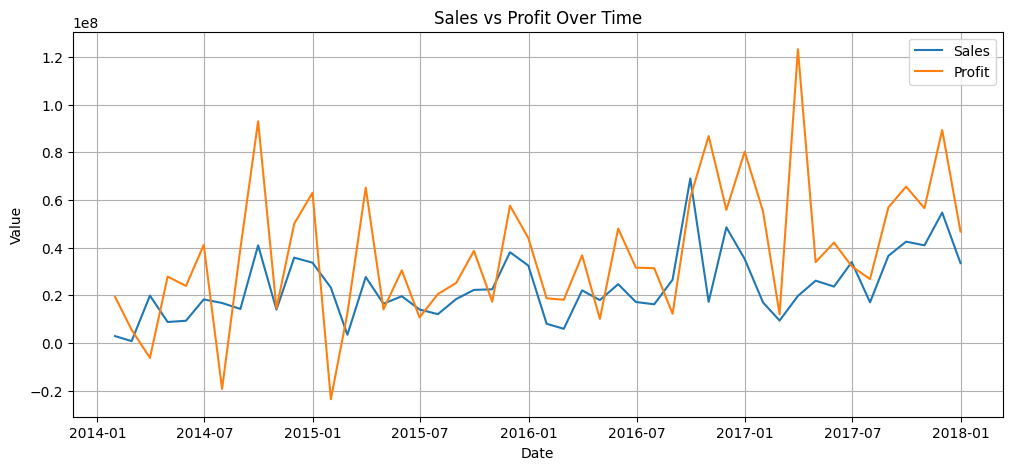

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales["Order Date"], monthly_sales["Sales"], label="Sales")
plt.plot(monthly_sales["Order Date"], monthly_sales["Profit"], label="Profit")
plt.title("Sales vs Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Aggragating by Region

region_performance = (
    df.groupby("Region")
    .agg({
        "Sales": "sum",
        "Profit": "sum"
    })
    .sort_values(by="Profit", ascending=False)
)

region_performance


,Sales,Profit
Region,,
West,365337643.0,715162034.0
East,292426972.0,653350930.0
South,151911640.0,225446647.0
Central,320514057.0,202946234.0
